In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Real estate.csv'
data = pd.read_csv(file_path)

# Display basic info and a preview of the data
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             

In [3]:
# Drop unnecessary columns
data = data.drop(columns=['No'])

# Rename columns for easier readability
data.rename(columns={
    'X1 transaction date': 'transaction_date',
    'X2 house age': 'house_age',
    'X3 distance to the nearest MRT station': 'distance_to_MRT',
    'X4 number of convenience stores': 'convenience_stores',
    'X5 latitude': 'latitude',
    'X6 longitude': 'longitude',
    'Y house price of unit area': 'price_per_unit_area'
}, inplace=True)

# Display the cleaned data
print(data.head())


   transaction_date  house_age  distance_to_MRT  convenience_stores  latitude  \
0          2012.917       32.0         84.87882                  10  24.98298   
1          2012.917       19.5        306.59470                   9  24.98034   
2          2013.583       13.3        561.98450                   5  24.98746   
3          2013.500       13.3        561.98450                   5  24.98746   
4          2012.833        5.0        390.56840                   5  24.97937   

   longitude  price_per_unit_area  
0  121.54024                 37.9  
1  121.53951                 42.2  
2  121.54391                 47.3  
3  121.54391                 54.8  
4  121.54245                 43.1  


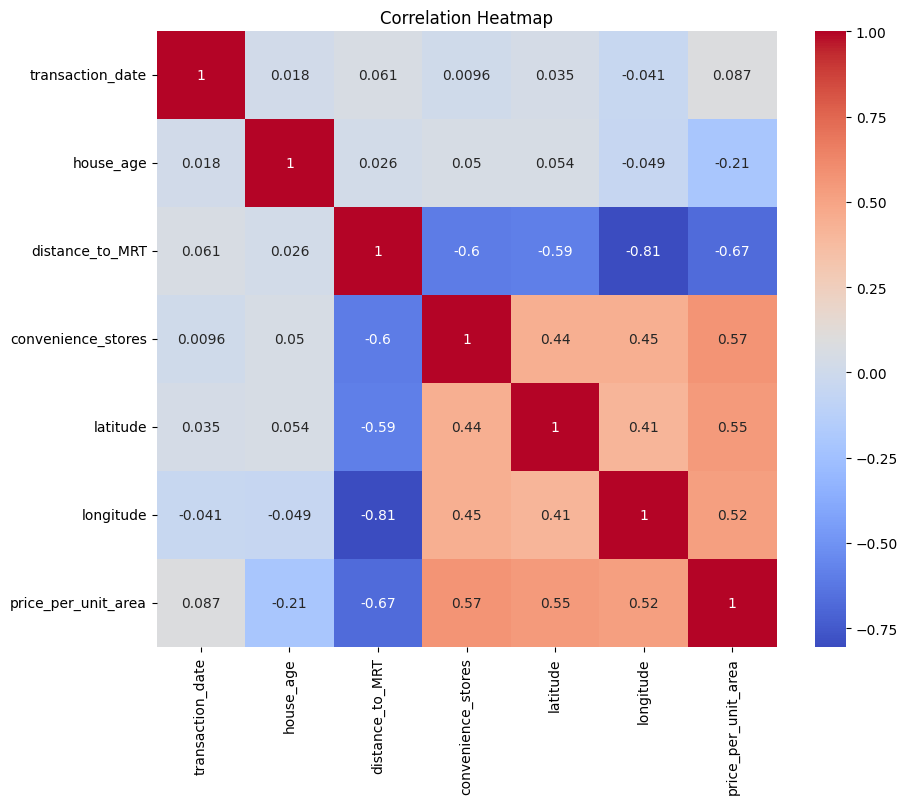

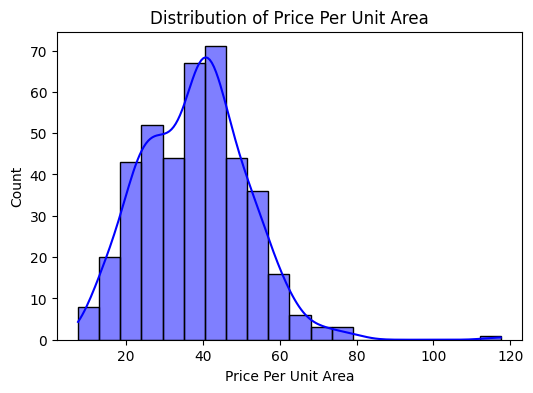

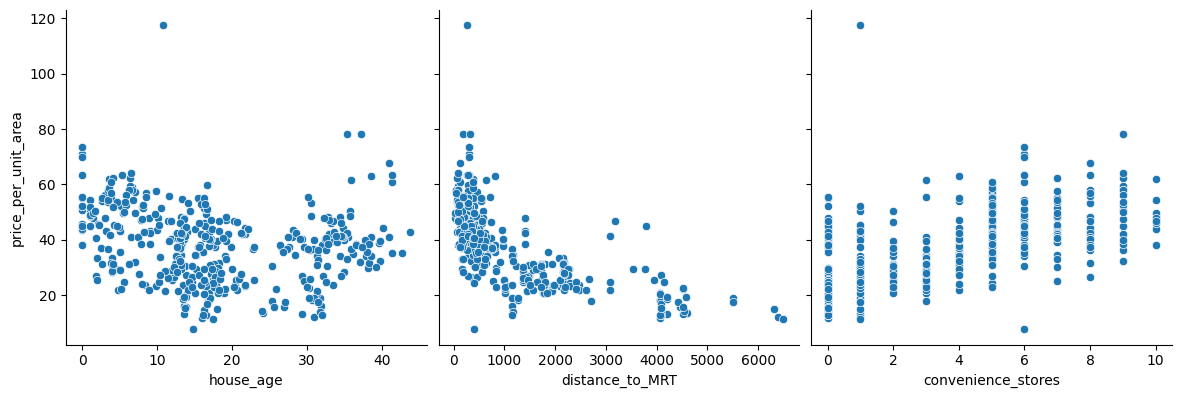

In [4]:
# Visualize correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.histplot(data['price_per_unit_area'], kde=True, bins=20, color='blue')
plt.title("Distribution of Price Per Unit Area")
plt.xlabel("Price Per Unit Area")
plt.show()

# Scatter plot for key relationships
sns.pairplot(data, x_vars=['house_age', 'distance_to_MRT', 'convenience_stores'],
             y_vars='price_per_unit_area', height=4)
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Define predictors (X) and target (y)
X = data.drop(columns=['price_per_unit_area'])
y = data['price_per_unit_area']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (331, 6)
Test set size: (83, 6)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_preds = lr_model.predict(X_test)

# Evaluate
print("Linear Regression MAE:", mean_absolute_error(y_test, lr_preds))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
print("Linear Regression R²:", r2_score(y_test, lr_preds))


Linear Regression MAE: 5.305355690074184
Linear Regression RMSE: 7.314753524521828
Linear Regression R²: 0.6810580555095801


In [9]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Gradient Boosting
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
gbr_preds = gbr_model.predict(X_test)

# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluate Models
def evaluate_model(name, y_true, y_pred):
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"{name} R²: {r2_score(y_true, y_pred):.2f}")

evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("Gradient Boosting", y_test, gbr_preds)
evaluate_model("XGBoost", y_test, xgb_preds)


Random Forest MAE: 3.96
Random Forest RMSE: 5.69
Random Forest R²: 0.81
Gradient Boosting MAE: 3.91
Gradient Boosting RMSE: 5.85
Gradient Boosting R²: 0.80
XGBoost MAE: 4.34
XGBoost RMSE: 6.23
XGBoost R²: 0.77


In [10]:
from sklearn.model_selection import GridSearchCV

# Example: Grid search for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}


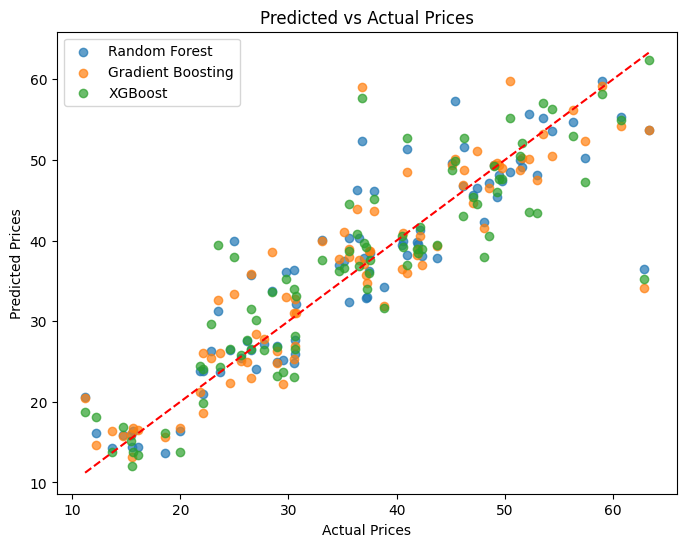

In [11]:
# Compare predictions with actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_preds, label="Random Forest", alpha=0.7)
plt.scatter(y_test, gbr_preds, label="Gradient Boosting", alpha=0.7)
plt.scatter(y_test, xgb_preds, label="XGBoost", alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.title("Predicted vs Actual Prices")
plt.show()


In [12]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv("Real estate.csv")

# Rename columns for better readability
df.rename(columns={
    'X1 transaction date': 'transaction_date',
    'X2 house age': 'house_age',
    'X3 distance to the nearest MRT station': 'distance_to_MRT',
    'X4 number of convenience stores': 'convenience_stores',
    'X5 latitude': 'latitude',
    'X6 longitude': 'longitude',
    'Y house price of unit area': 'price_per_unit_area'
}, inplace=True)

# Select only 6 features (excluding any extra columns)
X = df[['transaction_date', 'house_age', 'distance_to_MRT', 'convenience_stores', 'latitude', 'longitude']]
y = df['price_per_unit_area']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Model Performance (R² Score): {r2:.4f}")

# Save trained model
with open("real_estate_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model training complete! Saved as 'real_estate_model.pkl'.")


Model Performance (R² Score): 0.8068
✅ Model training complete! Saved as 'real_estate_model.pkl'.


In [14]:
import pickle

# Load the trained model
with open("real_estate_model.pkl", "rb") as file:
    model = pickle.load(file)

# Print the number of expected features
print("Model was trained with:", model.n_features_in_, "features")


Model was trained with: 6 features
